<a href="https://colab.research.google.com/github/jcarey-shu/dissertation/blob/main/suppobox_1_with_whois_imptr_gscv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load 3 👇 : suppobox_1 WHOIS imptr SHU GridSearchCV. Train & Test.

### Load 3 = 1000 legit domains; 1000 suppobox_1 word-based DGAs; SHU 10 correlated features; with WHOIS history using iterative imputer to replace NaN. GridSearchCV. Train & Test.

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

def load_data1():
  return pd.read_csv(Path("/content/gdrive/MyDrive/Colab/Data/loads/raw_data/suppobox_1.1000+whois-history.csv"))

df1 = load_data1()

Mounted at /content/gdrive


In [ ]:
display(df1)

,domain,nlp_1g_25p,nlp_1g_50p,nlp_1g_75p,nlp_1g_cov,nlp_1g_dist,nlp_1g_dst_ca,nlp_1g_dst_ch,nlp_1g_dst_em,nlp_1g_dst_eu,...,nlp_r_num_odn,nlp_r_sym_2dn,nlp_r_sym_fqdn,nlp_r_sym_odn,nlp_r_vow_2dn,nlp_r_vow_fqdn,nlp_r_vow_odn,whois_rec,whois_change,class
0,becauseopinion.net,0.0,0.0,0.058824,0.001488,11.0,32.410953,0.175610,9.429957,0.347997,...,0.0,0.0,0.055556,0.0,0.571429,0.500000,0.0,8,1.0,1
1,becauseshould.net,0.0,0.0,0.062500,0.001397,12.0,32.662722,0.186640,8.933634,0.356584,...,0.0,0.0,0.058824,0.0,0.461538,0.411765,0.0,0,NaN,1
2,brokenairplane.net,0.0,0.0,0.058824,0.001488,11.0,32.162541,0.175610,10.077016,0.355172,...,0.0,0.0,0.055556,0.0,0.428571,0.388889,0.0,0,NaN,1
3,brokenarrive.net,0.0,0.0,0.066667,0.001577,10.0,31.779075,0.199140,8.171134,0.366124,...,0.0,0.0,0.062500,0.0,0.416667,0.375000,0.0,0,NaN,1
4,brokenbanker.net,0.0,0.0,0.000000,0.001696,8.0,33.067525,0.199140,10.304467,0.380634,...,0.0,0.0,0.062500,0.0,0.333333,0.312500,0.0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,winterready.net,0.0,0.0,0.053571,0.001635,9.0,33.767635,0.213426,6.502203,0.395690,...,0.0,0.0,0.066667,0.0,0.363636,0.333333,0.0,12,0.0,1
958,wintersoldier.net,0.0,0.0,0.062500,0.001539,10.0,32.451120,0.186640,6.530854,0.357910,...,0.0,0.0,0.058824,0.0,0.384615,0.352941,0.0,18,0.0,1
959,winterstream.net,0.0,0.0,0.050000,0.001641,9.0,33.030664,0.199140,5.571134,0.385791,...,0.0,0.0,0.062500,0.0,0.333333,0.312500,0.0,19,1.0,1
960,wintersurprise.net,0.0,0.0,0.044118,0.001602,9.0,33.160475,0.175610,4.071233,0.390695,...,0.0,0.0,0.055556,0.0,0.357143,0.333333,0.0,0,NaN,1


#### Code block below uses Iterative Imputer to replace NaN in whois_change col

In [ ]:
# SHU Feature Selection
df1.drop(df1.columns.difference(['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
                                 'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq', \
                                 'whois_rec','whois_change','class']), axis=1, inplace=True)


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# SHU Feature Selection
df1_1 = df1[['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
             'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq', \
             'whois_rec','whois_change','class']]

imptr = IterativeImputer(BayesianRidge())

df1_2 = pd.DataFrame(imptr.fit_transform(df1_1), columns = df1_1.columns)

In [ ]:
display(df1_2)

,nlp_l_2dn,nlp_3g_dist,nlp_l_fqdn,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,whois_rec,whois_change,class
0,14.0,15.0,18.0,4.437463,16.0,0.173686,0.199537,0.050356,0.052018,15.0,8.0,1.000000,1.0
1,13.0,14.0,17.0,3.899423,15.0,0.168236,0.193276,0.048649,0.050254,14.0,0.0,0.378428,1.0
2,14.0,15.0,18.0,4.363157,14.0,0.162704,0.186797,0.050356,0.052018,15.0,0.0,0.375498,1.0
3,12.0,13.0,16.0,3.807849,13.0,0.156798,0.180072,0.046880,0.048427,13.0,0.0,0.381856,1.0
4,12.0,13.0,16.0,3.603266,13.0,0.156798,0.180072,0.046880,0.048427,13.0,0.0,0.382025,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,11.0,12.0,15.0,3.742544,13.0,0.156742,0.180071,0.045041,0.046527,12.0,12.0,0.000000,1.0
958,13.0,14.0,17.0,4.359877,14.0,0.162654,0.186796,0.048649,0.050254,14.0,18.0,0.000000,1.0
959,12.0,13.0,16.0,4.168387,14.0,0.162595,0.186796,0.046880,0.048427,13.0,19.0,1.000000,1.0
960,14.0,15.0,18.0,4.479558,16.0,0.173686,0.199537,0.050356,0.052018,15.0,0.0,0.374864,1.0


In [ ]:
df1_2.describe()

,nlp_l_2dn,nlp_3g_dist,nlp_l_fqdn,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,whois_rec,whois_change,class
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.0
mean,12.943867,13.898129,16.943867,4.083939,14.382536,0.164563,0.189022,0.048404,0.050001,14.035343,3.509356,0.419638,1.0
std,1.470122,1.470493,1.470122,0.444871,1.542741,0.008766,0.010083,0.002558,0.002642,1.599557,7.009909,0.350825,0.0
min,10.000000,10.000000,14.000000,2.888303,10.000000,0.137718,0.158118,0.041118,0.042474,11.000000,0.000000,0.000000,1.0
25%,12.000000,13.000000,16.000000,3.764466,13.000000,0.156798,0.180072,0.046880,0.048427,13.000000,0.000000,0.371760,1.0
50%,13.000000,14.000000,17.000000,4.070246,14.000000,0.162654,0.186796,0.048649,0.050254,14.000000,0.000000,0.378311,1.0
75%,14.000000,15.000000,18.000000,4.381265,15.750000,0.172363,0.197972,0.050356,0.052018,15.000000,4.750000,0.382050,1.0
max,17.000000,18.000000,21.000000,5.467182,19.000000,0.189048,0.217186,0.055160,0.056981,21.000000,43.000000,3.000000,1.0


In [ ]:
def load_data2():
  return pd.read_csv(Path("/content/gdrive/MyDrive/Colab/Data/loads/raw_data/tranco.1000+whois-history.csv"))

df2 = load_data2()

# SHU Feature Selection
df2.drop(df2.columns.difference(['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
                                 'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq', \
                                 'whois_rec','whois_change','class']), axis=1, inplace=True)

In [ ]:
df2.describe()

,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_dist,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,nlp_l_2dn,nlp_l_fqdn,whois_rec,whois_change,class
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.0
mean,2.170840,8.746493,0.126887,0.145765,7.868737,0.035774,0.036954,7.952906,6.690381,10.981964,28.958918,0.443888,0.0
std,0.820674,2.978839,0.021753,0.024986,3.056113,0.007118,0.007353,3.190505,3.194988,3.122326,9.375340,0.977355,0.0
min,0.482578,2.000000,0.061742,0.070932,1.000000,0.013004,0.013433,1.000000,1.000000,4.000000,2.000000,0.000000,0.0
25%,1.570859,7.000000,0.115286,0.132445,6.000000,0.031851,0.032902,6.000000,4.000000,9.000000,24.000000,0.000000,0.0
50%,2.072205,9.000000,0.130620,0.150061,8.000000,0.036778,0.037991,8.000000,6.000000,11.000000,28.000000,0.000000,0.0
75%,2.660217,10.000000,0.137680,0.158118,10.000000,0.041118,0.042474,10.000000,9.000000,13.000000,33.000000,0.000000,0.0
max,5.147269,19.000000,0.189118,0.217187,19.000000,0.056671,0.058541,22.000000,18.000000,22.000000,110.000000,4.000000,0.0


In [ ]:
data_load = [df1_2, df2]
df = pd.concat(data_load).reset_index(drop=True)

In [ ]:
display(df)

,nlp_l_2dn,nlp_3g_dist,nlp_l_fqdn,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,whois_rec,whois_change,class
0,14.0,15.0,18.0,4.437463,16.0,0.173686,0.199537,0.050356,0.052018,15.0,8.0,1.000000,1.0
1,13.0,14.0,17.0,3.899423,15.0,0.168236,0.193276,0.048649,0.050254,14.0,0.0,0.378428,1.0
2,14.0,15.0,18.0,4.363157,14.0,0.162704,0.186797,0.050356,0.052018,15.0,0.0,0.375498,1.0
3,12.0,13.0,16.0,3.807849,13.0,0.156798,0.180072,0.046880,0.048427,13.0,0.0,0.381856,1.0
4,12.0,13.0,16.0,3.603266,13.0,0.156798,0.180072,0.046880,0.048427,13.0,0.0,0.382025,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,6.0,7.0,10.0,1.621124,8.0,0.123198,0.141534,0.034403,0.035538,7.0,22.0,0.000000,0.0
1956,10.0,11.0,14.0,2.580115,12.0,0.150651,0.173074,0.043124,0.044547,11.0,19.0,0.000000,0.0
1957,4.0,5.0,8.0,1.354726,6.0,0.106775,0.122667,0.029076,0.030036,5.0,35.0,0.000000,0.0
1958,3.0,6.0,10.0,1.500263,7.0,0.115286,0.132445,0.031851,0.032902,6.0,13.0,1.000000,0.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

nlp_l_2dn       0
nlp_3g_dist     0
nlp_l_fqdn      0
nlp_1g_e        0
nlp_2g_dist     0
nlp_2g_ken      0
nlp_2g_spe      0
nlp_3g_ken      0
nlp_3g_spe      0
nlp_3g_sumsq    0
whois_rec       0
whois_change    0
class           0
dtype: int64

In [ ]:
df.dropna(how="any", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 1959
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nlp_l_2dn     1960 non-null   float64
 1   nlp_3g_dist   1960 non-null   float64
 2   nlp_l_fqdn    1960 non-null   float64
 3   nlp_1g_e      1960 non-null   float64
 4   nlp_2g_dist   1960 non-null   float64
 5   nlp_2g_ken    1960 non-null   float64
 6   nlp_2g_spe    1960 non-null   float64
 7   nlp_3g_ken    1960 non-null   float64
 8   nlp_3g_spe    1960 non-null   float64
 9   nlp_3g_sumsq  1960 non-null   float64
 10  whois_rec     1960 non-null   float64
 11  whois_change  1960 non-null   float64
 12  class         1960 non-null   float64
dtypes: float64(13)
memory usage: 214.4 KB


In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1] # the last column is the target

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



In [ ]:
IMAGES_PATH = Path() / "gdrive" / "MyDrive" / "Colab" / "Data" / "images" / "suppobox_1"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
df.describe()

,nlp_l_2dn,nlp_3g_dist,nlp_l_fqdn,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,whois_rec,whois_change,class
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000
mean,9.759694,10.828061,13.908163,3.109820,11.512755,0.145379,0.166996,0.041973,0.043358,10.938265,16.467857,0.431985,0.490816
std,4.004197,3.860578,3.861266,1.164045,3.691365,0.025169,0.028904,0.008300,0.008574,3.960598,15.191679,0.739370,0.500043
min,1.000000,1.000000,4.000000,0.482578,2.000000,0.061742,0.070932,0.013004,0.013433,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,11.000000,2.058133,8.000000,0.123240,0.141535,0.036778,0.037991,8.000000,0.000000,0.000000,0.000000
50%,11.000000,12.000000,15.000000,3.428079,12.000000,0.150749,0.173075,0.045041,0.046527,12.000000,18.500000,0.371519,0.000000
75%,13.000000,14.000000,17.000000,4.086255,14.000000,0.162718,0.186797,0.048649,0.050254,14.000000,29.000000,0.381891,1.000000
max,18.000000,19.000000,22.000000,5.467182,19.000000,0.189118,0.217187,0.056671,0.058541,22.000000,110.000000,4.000000,1.000000


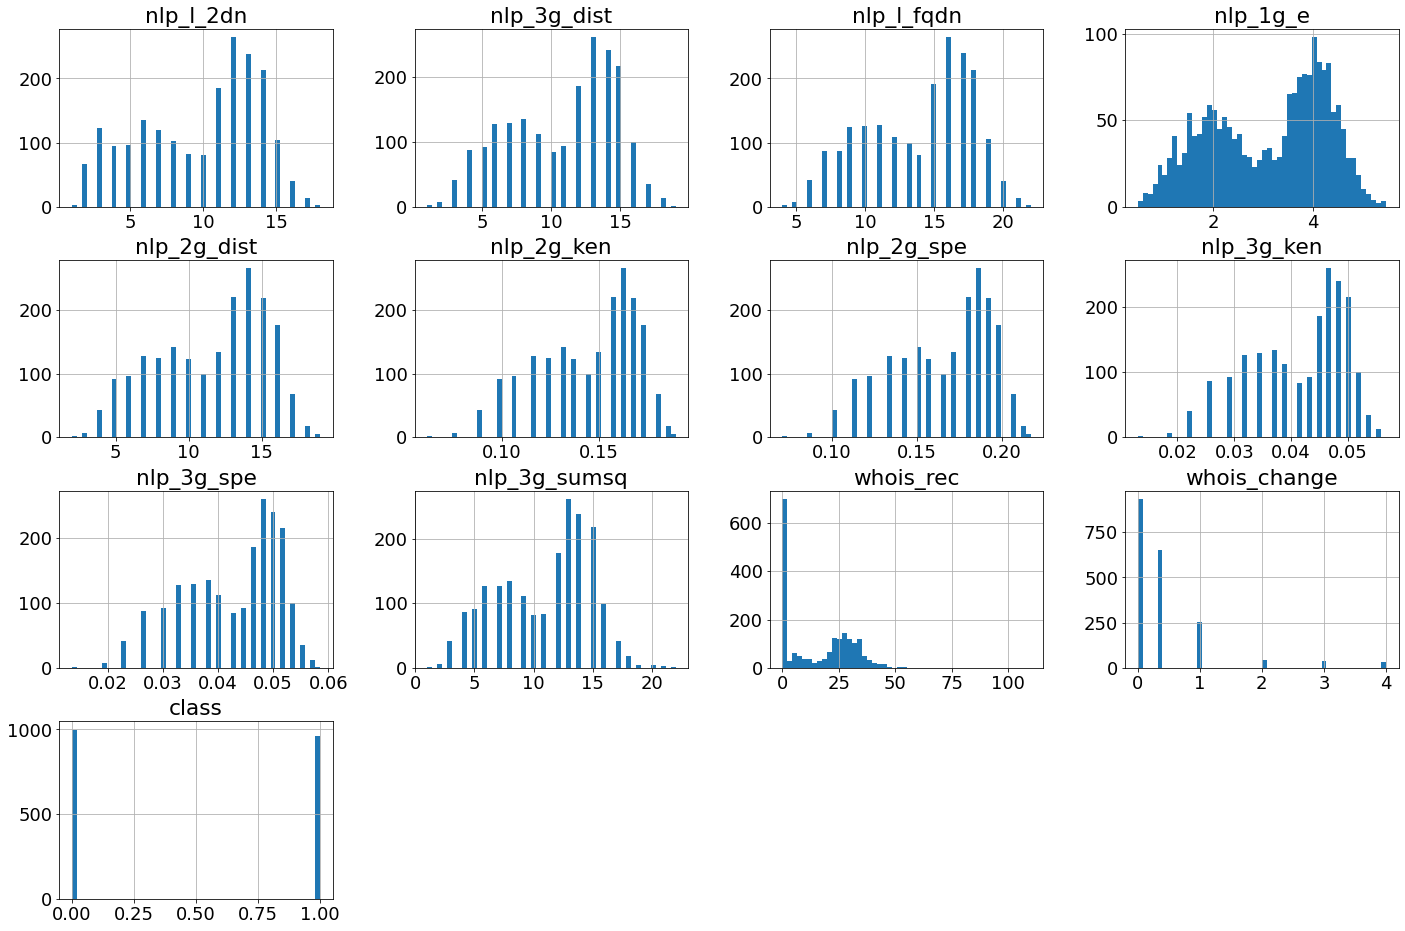

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(24, 16))
plt.show()

### Naive Bayes (NB) classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)


MultinomialNB()

In [ ]:
print(f"Naive Bayes scored {mnb_clf.score(X_test, y_test).round(5)} on test")
print(f"Naive Bayes scored {mnb_clf.score(X_train, y_train).round(5)} on train")

Naive Bayes scored 0.96599 on test
Naive Bayes scored 0.9519 on train


#### Confusion Matrix for mnb_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(mnb_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred).round(5)
cm

array([[686,  12],
       [ 53, 621]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.98104

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.92136

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.95027

<function matplotlib.pyplot.show(*args, **kw)>

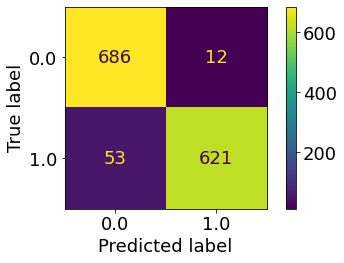

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_1_+whois_mnb_train_cm")
plt.show

#### Confusion Matrix for mnb_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(mnb_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred).round(5)
cm

array([[299,   1],
       [ 21, 267]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.99627

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.92708

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.96043

<function matplotlib.pyplot.show(*args, **kw)>

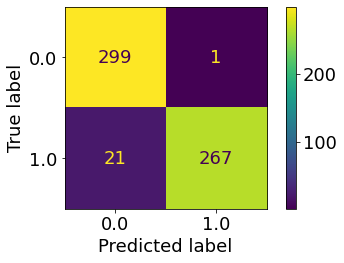

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_1_+whois_mnb_test_cm")
plt.show

### Logistic Regression (LG) classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(max_iter=1000)
lg_clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
print(f"Logistic Regression scored {lg_clf.score(X_test, y_test).round(5)} on test")
print(f"Logistic Regression scored {lg_clf.score(X_train, y_train).round(5)} on train")

Logistic Regression scored 0.97959 on test
Logistic Regression scored 0.9723 on train


#### Confusion Matrix for lg_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lg_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[681,  17],
       [ 22, 652]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.97459

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.96736

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.97096

<function matplotlib.pyplot.show(*args, **kw)>

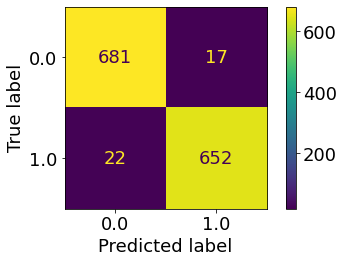

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_1_+whois_lg_train_cm")
plt.show

#### Confusion Matrix for lg_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(lg_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[295,   5],
       [  8, 280]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.98246

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.97222

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97731

<function matplotlib.pyplot.show(*args, **kw)>

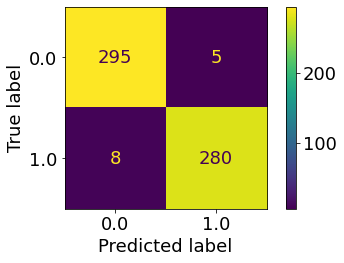

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_1_+whois_lg_test_cm")
plt.show

### K-Nearest Neighbours (KNN) classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [ ]:
print(f"K-Nearest Neighbours scored {knn_clf.score(X_test, y_test).round(5)} on test")
print(f"K-Nearest Neighbours scored {knn_clf.score(X_train, y_train).round(5)} on train")

K-Nearest Neighbours scored 0.98129 on test
K-Nearest Neighbours scored 0.97522 on train


#### Confusion Matrix for knn_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[667,  31],
       [ 27, 647]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.95428

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.95994

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.9571

<function matplotlib.pyplot.show(*args, **kw)>

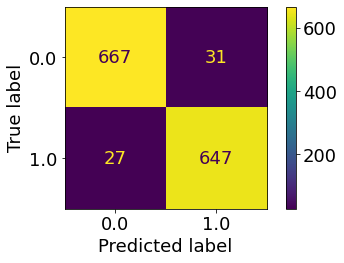

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_1_+whois_knn_train_cm")
plt.show

#### Confusion Matrix for knn_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(knn_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[296,   4],
       [  8, 280]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.98592

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.97222

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97902

<function matplotlib.pyplot.show(*args, **kw)>

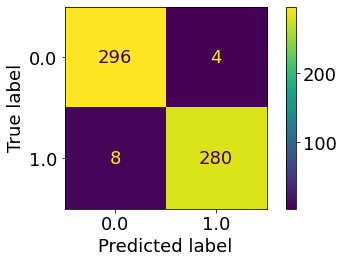

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_1_+whois_knn_test_cm")
plt.show

###✋Support Vector Machine (SVM) classifier

In [ ]:
# if we receive ConvergenceWarning then use:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_norm_svm = StandardScaler().fit_transform(X)

# Generate train/test sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_norm_svm, y, test_size=0.3, random_state=42
)

# re-run above LinearSVC


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm_clf=LinearSVC(C=0.00001)
svm_clf.fit(X_train_svm, y_train_svm)
svm_clf1 = CalibratedClassifierCV(svm_clf)
svm_clf1.fit(X_train_svm, y_train_svm)


CalibratedClassifierCV(base_estimator=LinearSVC(C=1e-05))

In [ ]:
print(f"SVM scored {svm_clf.score(X_test_svm, y_test_svm).round(5)} on test")
print(f"SVM scored {svm_clf.score(X_train_svm, y_train_svm).round(5)} on train")

SVM scored 0.93027 on test
SVM scored 0.91764 on train


#### Confusion Matrix for svm_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_svm_pred = cross_val_predict(svm_clf, X_train_svm, y_train_svm, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_svm, y_train_svm_pred)
cm

array([[586, 112],
       [  1, 673]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_svm, y_train_svm_pred).round(5)

0.85732

In [ ]:
recall_score(y_train_svm, y_train_svm_pred).round(5)

0.99852

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_svm, y_train_svm_pred).round(5)

0.92255

<function matplotlib.pyplot.show(*args, **kw)>

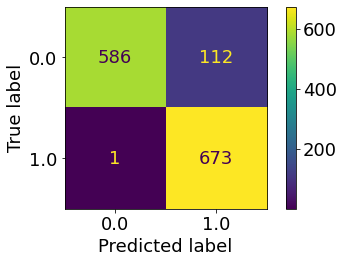

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train_svm, y_train_svm_pred)
save_fig("suppobox_1_+whois_svm_train_cm")
plt.show

#### Confusion Matrix for svm_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_svm_pred = cross_val_predict(svm_clf, X_test_svm, y_test_svm, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_svm, y_test_svm_pred)
cm

array([[258,  42],
       [  0, 288]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_svm, y_test_svm_pred).round(5)

0.87273

In [ ]:
recall_score(y_test_svm, y_test_svm_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_svm, y_test_svm_pred).round(5)

0.93204

<function matplotlib.pyplot.show(*args, **kw)>

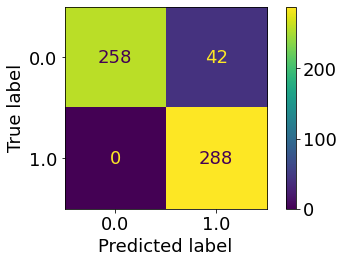

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_svm, y_test_svm_pred)
save_fig("suppobox_1_+whois_svm_test_cm")
plt.show

### ✅Decision Tree (DT) classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint
dt_clf = DecisionTreeClassifier()


In [ ]:
print('Parameters currently in use:\n')
pprint(dt_clf.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [ ]:
param_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,15,20,30,40,50],
              'max_features': [1, 2, 3, 4,5,6,7,8,9,10],
              'random_state':[0, 1, 2, 3, 4, 5, 10, 15,20,35,50,80,100,150,180,200],
              'criterion':['gini','entropy'],
              }

In [ ]:
#GSCV_dt_clf = GridSearchCV(dt_clf, param_grid=param_grid, cv=10)
#GSCV_dt_clf.fit(X_train, y_train)

In [ ]:
#GSCV_dt_clf.best_params_

In [ ]:
dt_clf1 = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features=4, random_state=35)

In [ ]:
dt_clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=4, random_state=35)

In [ ]:
print(f"Decision Tree scored {dt_clf1.score(X_test, y_test).round(5)} on test")
print(f"Decision Tree scored {dt_clf1.score(X_train, y_train).round(5)} on train")

Decision Tree scored 0.97619 on test
Decision Tree scored 0.98688 on train


#### Confusion Matrix for dt_clf1 train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(dt_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[667,  31],
       [ 18, 656]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.95488

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.97329

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.964

<function matplotlib.pyplot.show(*args, **kw)>

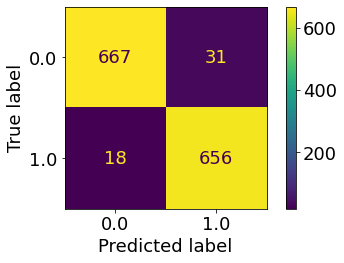

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_1_+whois_dt_train_cm")
plt.show

#### Confusion Matrix for dt_clf1 test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(dt_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[288,  12],
       [  6, 282]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.95918

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.97917

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.96907

<function matplotlib.pyplot.show(*args, **kw)>

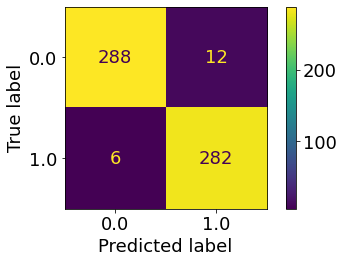

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_1_+whois_dt_test_cm")
plt.show

### Bagging Decision Tree (BG) classifier (ensemble)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg_clf=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

In [ ]:
print(f"Bagging Decision Tree scored {bg_clf.score(X_test, y_test).round(5)} on test")
print(f"Bagging Decision Tree scored {bg_clf.score(X_train, y_train).round(5)} on train")

Bagging Decision Tree scored 0.97959 on test
Bagging Decision Tree scored 0.98907 on train


#### Confusion Matrix for bg_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(bg_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[680,  18],
       [ 26, 648]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.97297

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.96142

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.96716

<function matplotlib.pyplot.show(*args, **kw)>

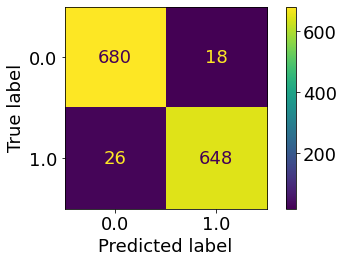

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_1_+whois_bg_train_cm")
plt.show

#### Confusion Matrix for bg_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(bg_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[295,   5],
       [  5, 283]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.98264

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.98264

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.98264

<function matplotlib.pyplot.show(*args, **kw)>

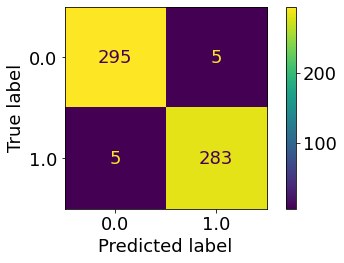

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_1_+whois_bg_test_cm")
plt.show

### ✅Boosting Decision Tree (ADB) classifier (ensemble)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
adb_clf = AdaBoostClassifier(DecisionTreeClassifier())

In [ ]:
print('Parameters currently in use:\n')
pprint(adb_clf.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [ ]:
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]
              }

In [ ]:
#GSCV_adb_clf = GridSearchCV(adb_clf, param_grid=param_grid, scoring='f1', n_jobs=-1)
#GSCV_adb_clf.fit(X_train, y_train)

In [ ]:
#GSCV_adb_clf.best_params_

In [ ]:
adb_clf1 = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=8,max_depth=5),n_estimators=10,learning_rate=0.01)

In [ ]:
adb_clf1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         min_samples_leaf=8),
                   learning_rate=0.01, n_estimators=10)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb_clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb_clf.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         min_samples_split=10),
                   learning_rate=0.6, n_estimators=10)

In [ ]:
print(f"AdaBoost Classifier scored {adb_clf1.score(X_test, y_test).round(5)} on test")
print(f"AdaBoost Classifier scored {adb_clf1.score(X_train, y_train).round(5)} on train")

AdaBoost Classifier scored 0.9881 on test
AdaBoost Classifier scored 0.98469 on train


#### Confusion Matrix for adb_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(adb_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[680,  18],
       [ 27, 647]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.97293

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.95994

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.96639

<function matplotlib.pyplot.show(*args, **kw)>

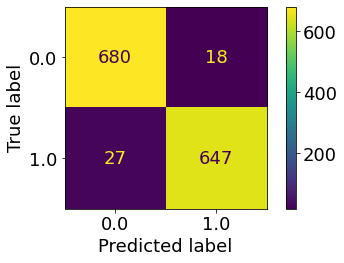

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_1_+whois_adb_train_cm")
plt.show

#### Confusion Matrix for adb_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(adb_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[292,   8],
       [  5, 283]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.97251

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.98264

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97755

<function matplotlib.pyplot.show(*args, **kw)>

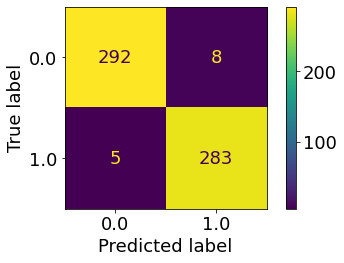

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_1_+whois_adb_test_cm")
plt.show

### ✅Random Forest (RF) classifier (ensemble)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
#GSCV_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
#GSCV_rf_clf.fit(X_train, y_train)


In [ ]:
#GSCV_rf_clf.best_params_

In [ ]:
rf_clf1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, \
                                 max_depth=7, criterion='entropy')

In [ ]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200,
                       random_state=42)

In [ ]:
print(f"Random Forest scored {rf_clf1.score(X_test, y_test).round(5)} on test")
print(f"Random Forest scored {rf_clf1.score(X_train, y_train).round(5)} on train")

Random Forest scored 0.98129 on test
Random Forest scored 0.99125 on train


#### Confusion Matrix for rf_clf1 train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rf_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[674,  24],
       [ 22, 652]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.9645

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.96736

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.96593

<function matplotlib.pyplot.show(*args, **kw)>

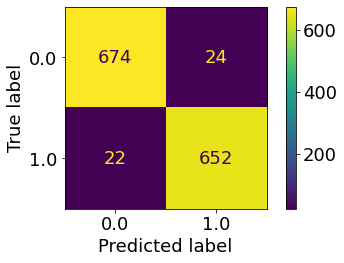

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_1_+whois_rf_train_cm")
plt.show

#### Confusion Matrix for rf_clf1 test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rf_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[296,   4],
       [  5, 283]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.98606

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.98264

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.98435

<function matplotlib.pyplot.show(*args, **kw)>

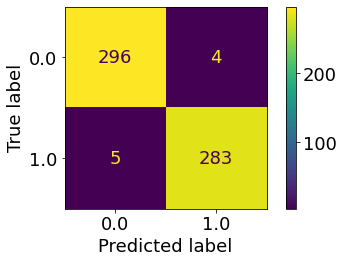

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_1_+whois_rf_test_cm")
plt.show

### 👉Receiver Operating Characteristic (ROC) curve

In [ ]:
rndm_probs = [0 for _ in range(len(y_test))]
mnb_probs = mnb_clf.predict_proba(X_test)
lg_probs = lg_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
svm_probs = svm_clf1.predict_proba(X_test_svm)
dt_probs = dt_clf1.predict_proba(X_test)
bg_probs = bg_clf.predict_proba(X_test)
adb_probs = adb_clf1.predict_proba(X_test)
rf_probs = rf_clf1.predict_proba(X_test)

In [ ]:
mnb_probs = mnb_probs[:, 1]
lg_probs = lg_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
dt_probs = dt_probs[:, 1]
bg_probs = bg_probs[:, 1]
adb_probs = adb_probs[:, 1]
rf_probs = rf_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rndm_auc = roc_auc_score(y_test, rndm_probs)
mnb_auc = roc_auc_score(y_test, mnb_probs)
lg_auc = roc_auc_score(y_test, lg_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
bg_auc = roc_auc_score(y_test, bg_probs)
adb_auc = roc_auc_score(y_test, adb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.5f' % (rndm_auc))
print('Naive Bayes: AUROC = %.5f' % (mnb_auc))
print('Logistic Regression: AUROC = %.5f' % (lg_auc))
print('K-Nearest Neighbour: AUROC = %.5f' % (knn_auc))
print('Support Vector Machine: AUROC = %.5f' % (svm_auc))
print('Decision Tree: AUROC = %.5f' % (knn_auc))
print('Bagging Decision Tree: AUROC = %.5f' % (bg_auc))
print('Boosting Decision Tree: AUROC = %.5f' % (adb_auc))
print('Random Forest: AUROC = %.5f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.50000
Naive Bayes: AUROC = 0.99348
Logistic Regression: AUROC = 0.99730
K-Nearest Neighbour: AUROC = 0.99552
Support Vector Machine: AUROC = 0.97610
Decision Tree: AUROC = 0.99552
Bagging Decision Tree: AUROC = 0.99710
Boosting Decision Tree: AUROC = 0.99907
Random Forest: AUROC = 0.99899


In [ ]:
rndm_fpr, rndm_tpr, _ = roc_curve(y_test, rndm_probs)
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, mnb_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bg_probs)
adb_fpr, adb_tpr, _ = roc_curve(y_test, adb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

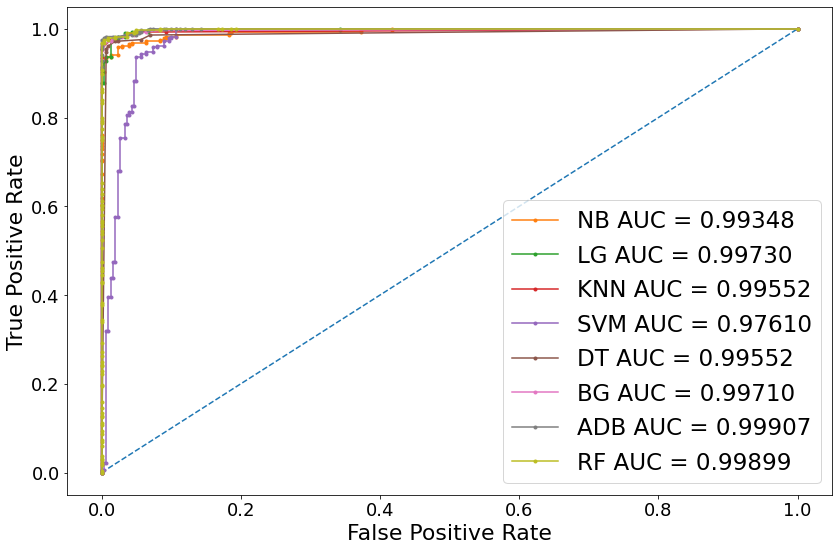

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(rndm_fpr, rndm_tpr, linestyle='--')
plt.plot(mnb_fpr, mnb_tpr, marker='.', label='NB AUC = %0.5f' % mnb_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='LG AUC = %0.5f' % lg_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN AUC = %0.5f' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM AUC = %0.5f' % svm_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT AUC = %0.5f' % knn_auc)
plt.plot(bg_fpr, bg_tpr, marker='.', label='BG AUC = %0.5f' % bg_auc)
plt.plot(adb_fpr, adb_tpr, marker='.', label='ADB AUC = %0.5f' % adb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF AUC = %0.5f' % rf_auc)

# Title
#plt.title('ROC Plot', fontsize=22)
# Axis labels
plt.xlabel('False Positive Rate', fontsize=22)
plt.ylabel('True Positive Rate', fontsize=22)
# Show legend
plt.legend(fontsize=23)
# Save Fig
save_fig("suppobox_1_+whois_imptr_gscv_roc")
# Show plot
plt.show()